In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy

import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import geopandas
import cartopy.io.shapereader as shpreader
import shapely

from matplotlib.patches import Rectangle, Patch

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})



In [2]:
impact_preds = pd.read_csv('../data/1_impact_predictions.csv')
df_studies = pd.read_csv('../data/study_da.csv').merge(impact_preds)
df_studies.head()

places = pd.read_csv('../data/place_df.csv').merge(df_studies,left_on="doc_id",right_on="id")
places.head()

,word,spans,country_predicted,country_conf,doc_id,admin1,lat,lon,country_code3,geonameid,...,"12 - Rivers, lakes, and soil moisture - std_prediction","12 - Rivers, lakes, and soil moisture - lower_pred","12 - Rivers, lakes, and soil moisture - upper_pred",12 - Terrestrial ES - mean_prediction,12 - Terrestrial ES - std_prediction,12 - Terrestrial ES - lower_pred,12 - Terrestrial ES - upper_pred,12 - Other systems - mean_prediction,12 - Other systems - lower_pred,12 - Other systems - upper_pred
0,San Diego,"[{'start': 114, 'end': 123}]",USA,0.963741,3307272,California,33.02820,-116.77021,USA,5391832.0,...,0.006502,0.042984,0.055988,0.160107,0.044488,0.115619,0.204594,0.160968,0.111754,0.210182
1,Alaska,"[{'start': 91, 'end': 97}]",USA,0.959621,355004,Alaska,64.00028,-150.00028,USA,5879092.0,...,0.022931,0.861229,0.907090,0.071920,0.021416,0.050504,0.093335,0.115841,0.092910,0.138771
2,Bermejo,"[{'start': 49, 'end': 56}]",USA,0.927073,4603,Louisiana,31.01935,-91.74790,USA,4338480.0,...,0.059700,0.785386,0.904785,0.042037,0.013198,0.028839,0.055235,0.154914,0.095215,0.214614
3,Argentina,"[{'start': 64, 'end': 73}]",ARG,0.951695,4603,Santa Fe Province,-34.00000,-64.00000,ARG,3865483.0,...,0.059700,0.785386,0.904785,0.042037,0.013198,0.028839,0.055235,0.154914,0.095215,0.214614
4,Miocene,"[{'start': 22, 'end': 29}]",CAN,0.771986,91374,British Columbia,52.23361,-121.69972,CAN,6075049.0,...,0.053964,0.016691,0.124618,0.853112,0.060857,0.792255,0.913969,0.146888,0.086031,0.207745


In [3]:
shpfilename = shpreader.natural_earth(resolution='50m',
                      category='cultural',
                      name='admin_0_countries')

adm0shps = geopandas.read_file(shpfilename)
adm0shps.query('ADMIN=="Sudan"')

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
52,Admin-0 country,1,3,Sudan,SDN,0,2,Sovereign country,Sudan,SDN,...,ìë¨,Soedan,Sudan,SudÃ£o,Ð¡ÑÐ´Ð°Ð½,Sudan,Sudan,Sudan,èä¸¹å ±åå½,"POLYGON ((34.07812 9.46152, 34.07676 9.46152, ..."


White Nile - 19 studies
Republic of the Sudan - 11 studies
South Darfur - 7 studies
Atbara - 5 studies
As Sidera Ash Sharqiya - 4 studies
Khartoum - 4 studies


(0.0, 19.95, -0.5, 5.5)

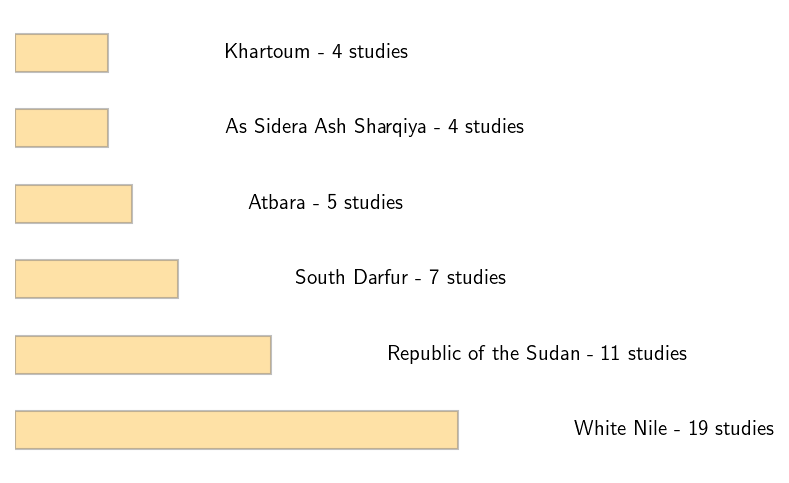

In [7]:
shp_ndf_df = pd.read_csv('../data/country_ndf_correspondence.csv')
df_ndf = pd.read_csv(f'../data/study_gridcell_2.5.csv')

country = "SDN"
country_index = adm0shps[adm0shps['SOV_A3']==country].index[0]
ndf_ids = shp_ndf_df.loc[shp_ndf_df["shpfile_id"]==country_index, "ndf_id"]

doc_ids = df_ndf.loc[df_ndf["ndf_id"].isin(ndf_ids),"doc_id"]

places = places.loc[~(places['word']=="Sudan") & (places['gridcells']!=len(ndf_ids))]

splaces = places[(places["doc_id"].isin(doc_ids)) & (places["country_predicted"]==country)].groupby('place_name').size().sort_values(ascending=False).head(6)

places[places['word']=="Sudan"]

fig, ax = plt.subplots(dpi=150, figsize=(4,4))

splaces.plot.barh(color="#fec44f", alpha=0.5, edgecolor="grey", ax=ax)

for i, c in enumerate(splaces):
    print(f"{splaces.index[i]} - {c} studies")
    ax.text(c+5, i, f"{splaces.index[i]} - {c} studies", va="center")
    
#ax.set_xlim(0,c+1)
plt.axis('off')

In [8]:
df = pd.read_csv('../data/2_merged_da_data.csv')

da_var = "updated_temp"
study_var = "temp_study_prop"
var = "Temperature"

df.loc[ndf_ids,"Country"]=df.loc[ndf_ids,study_var]
df.loc[ndf_ids,"cmask"]=np.nan

df["na"] = np.where(pd.isna(df[da_var]),1,np.nan)

df.head()

,LAT,LON,LAT_25,LON_25,LAT_5,LON_5,knutson_precip,updated_precip,knutson_temp,updated_temp,...,precip_da_binary,n_da_impacts,max_da_cat,study_addition,total_study_prop,area,is_land,Country,cmask,na
0,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,NaN,NaN,...,0,0,0.0,add,0.0,1685.654015,False,NaN,NaN,1.0
1,-88.75,-176.25,-88.75,-176.25,-87.5,-177.5,NaN,NaN,NaN,NaN,...,0,0,0.0,add,0.0,1685.654015,False,NaN,NaN,1.0
2,-88.75,-173.75,-88.75,-173.75,-87.5,-172.5,NaN,NaN,NaN,NaN,...,0,0,0.0,add,0.0,1685.654015,False,NaN,NaN,1.0
3,-88.75,-171.25,-88.75,-171.25,-87.5,-172.5,NaN,NaN,NaN,NaN,...,0,0,0.0,add,0.0,1685.654015,False,NaN,NaN,1.0
4,-88.75,-168.75,-88.75,-168.75,-87.5,-167.5,NaN,NaN,NaN,NaN,...,0,0,0.0,add,0.0,1685.654015,False,NaN,NaN,1.0


In [9]:
cdf = df.loc[ndf_ids]

cdf.groupby(da_var, dropna=False).size()

updated_temp
0.0     1
2.0    14
3.0     6
NaN     6
dtype: int64

In [10]:
import cartopy.io.img_tiles as cimgt
stamen_terrain = cimgt.Stamen('terrain')

/home/max/software/cartopy17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errn

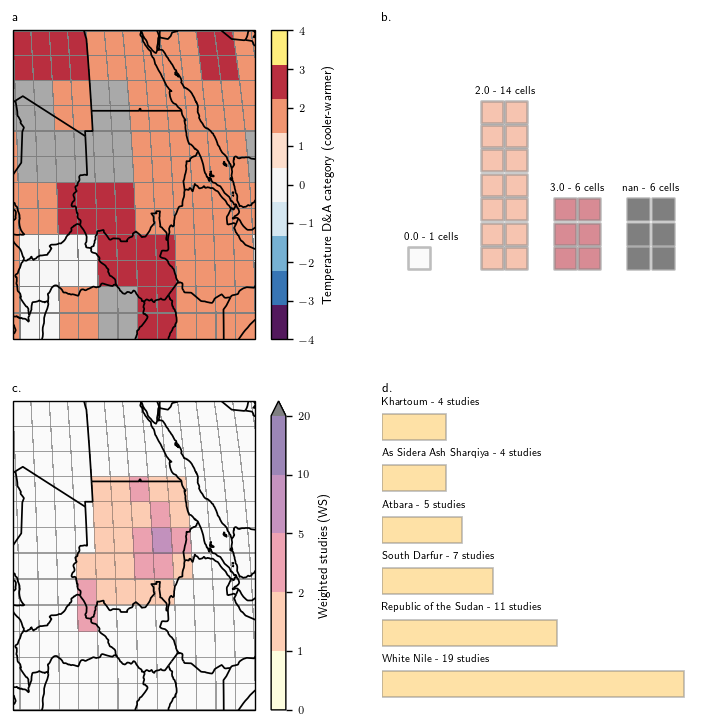

In [16]:

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

degrees = 2.5
degrees = 0



fig = plt.figure(dpi=125, figsize=(7.2,7.2))
gs = fig.add_gridspec(2, 2, figure=fig)

ax = plt.subplot(gs[0,0], projection=ccrs.EqualEarth())
ax.set_title("a", loc="left", fontweight="bold", fontsize=7)

ax.coastlines(lw=1)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, lw=1)

extent = [15,45,0,30]# Sudan
#ax.set_extent([48,87,40,55]) # Kazakhstan
#ax.set_extent([60,80,20,40]) # Pakistan

ax.set_extent(extent) 



ax.add_image(stamen_terrain, 5)



n = np.array(df[da_var]).reshape(len(df.LAT.unique()),len(df.LON.unique()))

bn = np.array(df.cmask).reshape(len(df.LAT.unique()),len(df.LON.unique()))

cn = np.array(df.na).reshape(len(df.LAT.unique()),len(df.LON.unique()))

colors = ['#ffed6f','#b2182b','#ef8a62','#fddbc7','white','#d1e5f0','#67a9cf','#2166ac',"#33a02c"]
colors = ['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
colors.reverse()

mesh = ax.pcolormesh(
    df.LON.unique()-degrees*0.5,
    df.LAT.unique()-degrees*0.5,
    n,
    cmap=mpl.colors.ListedColormap(colors),
    vmin=-4, vmax=4,
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    lw=0.1,
    alpha=0.9
)

cmap = mesh.get_cmap()

mmesh = ax.pcolormesh(
    df.LON.unique()-degrees*0.5,
    df.LAT.unique()-degrees*0.5,
    cn,
    cmap = mpl.colors.ListedColormap(["darkgrey"]),
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    lw=0.1,
    alpha=1
)

cbar = plt.colorbar(mesh)
cbar.set_label(f'{var} D\&A category (cooler-warmer)', fontsize=7)
cbar.ax.tick_params(labelsize=6)

#########################################

ax = plt.subplot(gs[0,1])
i = 0

for name, group in cdf.groupby(da_var, dropna=False):
    rects = []
    for j in range(group.shape[0]):
        x = i*3+1+j%2
        y = j//2
        rect = Rectangle((x+0.05,y+0.05), 0.9,0.9)
        rects.append(rect)
        
    pc = PatchCollection(rects, facecolor=cmap(mesh.norm(name)), alpha=0.5,
                         edgecolor="grey", lw=1.5)

    # Add collection to axes
    ax.add_collection(pc)
    
    ax.text(i*3+2,y+1.2,f"{name} - {j+1} cells", ha="center",va="bottom", fontsize=6)
    
    i+=1
    
plt.axis('equal')
plt.axis('off')

    
#ax.set_ylim(0, i*3+1)
ax.set_ylim(0,7)
ax.set_xlim(0, i*3+1)

ax.set_title("b.", loc="left", fontweight="bold", fontsize=7)


###################################################
######

n = np.array(df.Country).reshape(len(df.LAT.unique()),len(df.LON.unique()))

vm = np.nanmax(n)

cn = np.array(df.na).reshape(len(df.LAT.unique()),len(df.LON.unique()))

bn = np.array(df.cmask).reshape(len(df.LAT.unique()),len(df.LON.unique()))

ax = plt.subplot(gs[1,0], projection=ccrs.EqualEarth())
ax.set_title("c.", loc="left", fontweight="bold", fontsize=7)

ax.coastlines(lw=1)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, lw=1)
#ax.set_extent([0,30,50,80])

ax.set_extent(extent)

ax.add_image(stamen_terrain, 5)

bounds = np.array([0,1,2,5,10,20,50,100,200])
bounds = np.array([0,1,2,5,10,20])
cmap_mgm = plt.cm.get_cmap('magma_r',len(bounds))
colors = list(cmap_mgm(np.arange(len(bounds))))
cmap = mpl.colors.ListedColormap(colors[:-1], "")
cmap.set_over(colors[-1])



mesh = ax.pcolormesh(
    df.LON.unique()-degrees*0.5,
    df.LAT.unique()-degrees*0.5,
    n,
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    norm = mpl.colors.BoundaryNorm(bounds,ncolors=len(bounds)-1,clip=False),
    cmap=cmap, 
    lw=0.1,
    alpha=0.5
)

cbar = plt.colorbar(mesh, extend="max")
cbar.set_label('Weighted studies (WS)', fontsize=7)
cbar.ax.tick_params(labelsize=6)

###########################

ax = plt.subplot(gs[1,1])
ax.set_title("d.", loc="left", fontweight="bold", fontsize=7)

splaces.plot.barh(color="#fec44f", alpha=0.5, edgecolor="grey", ax=ax)

for i, c in enumerate(splaces):
    ax.text(0, i+0.5, f"{splaces.index[i]} - {c} studies", va="center", fontsize=6)
    
#ax.set_xlim(0,c+1)
ax.axis('off')

plt.savefig('../figures/si_figure_9.pdf', bbox_inches="tight")
plt.savefig('../figures/si_figure_9.png', dpi=150, bbox_inches="tight")
plt.savefig('../figures/si_figure_9.jpg', bbox_inches="tight")
plt.savefig('../figures/si_figure_9.tiff', dpi=150, bbox_inches="tight")

In [12]:
places[places['word']=="Western Australia"]

,word,spans,country_predicted,country_conf,doc_id,admin1,lat,lon,country_code3,geonameid,...,"12 - Rivers, lakes, and soil moisture - std_prediction","12 - Rivers, lakes, and soil moisture - lower_pred","12 - Rivers, lakes, and soil moisture - upper_pred",12 - Terrestrial ES - mean_prediction,12 - Terrestrial ES - std_prediction,12 - Terrestrial ES - lower_pred,12 - Terrestrial ES - upper_pred,12 - Other systems - mean_prediction,12 - Other systems - lower_pred,12 - Other systems - upper_pred
96,Western Australia,"[{'start': 1613, 'end': 1630}]",AUS,0.946707,1290499,Western Australia,-25.0,122.0,AUS,2058645.0,...,0.009465,0.031047,0.049976,0.891623,0.039827,0.851796,0.931451,0.108377,0.068549,0.148204
841,Western Australia,"[{'start': 425, 'end': 442}]",AUS,0.963741,1284645,Western Australia,-25.0,122.0,AUS,2058645.0,...,0.006422,0.020056,0.032900,0.061491,0.008511,0.052980,0.070002,0.077523,0.069732,0.085314
846,Western Australia,"[{'start': 395, 'end': 412}]",AUS,0.951695,1345851,Western Australia,-25.0,122.0,AUS,2058645.0,...,0.175845,0.536429,0.888118,0.044428,0.011319,0.033109,0.055747,0.287726,0.111882,0.463571
2297,Western Australia,"[{'start': 324, 'end': 341}]",AUS,0.945583,63604,Western Australia,-25.0,122.0,AUS,2058645.0,...,0.121554,0.019880,0.262987,0.036624,0.008136,0.028488,0.044759,0.858567,0.737013,0.968871
2521,Western Australia,"[{'start': 98, 'end': 115}]",AUS,0.963741,3322205,Western Australia,-25.0,122.0,AUS,2058645.0,...,0.012404,0.067435,0.092243,0.081053,0.013541,0.067512,0.094593,0.108080,0.074332,0.141829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146854,Western Australia,"[{'start': 76, 'end': 93}]",AUS,0.946520,1516207,Western Australia,-25.0,122.0,AUS,2058645.0,...,0.091798,0.042967,0.226564,0.046909,0.010496,0.036413,0.057404,0.586547,0.352347,0.820747
147525,Western Australia,"[{'start': 204, 'end': 221}]",AUS,0.951695,389027,Western Australia,-25.0,122.0,AUS,2058645.0,...,0.111428,0.555030,0.777886,0.044299,0.019400,0.024899,0.063699,0.333542,0.222114,0.444970
148378,Western Australia,"[{'start': 78, 'end': 95}]",AUS,0.963741,794380,Western Australia,-25.0,122.0,AUS,2058645.0,...,0.193580,0.094869,0.482029,0.029743,0.005417,0.024325,0.035160,0.711551,0.517971,0.905131
153584,Western Australia,"[{'start': 578, 'end': 595}]",AUS,0.951695,789482,Western Australia,-25.0,122.0,AUS,2058645.0,...,0.005945,0.022811,0.034701,0.803921,0.124972,0.678949,0.928894,0.196079,0.071106,0.321051


In [13]:
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_1_states_provinces')

adm1shps = geopandas.read_file(shpfilename)
adm1shps[adm1shps['name']=="Western Australia"]

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry
1745,Admin-1 scale rank,2,AUS-2651,2651,AU-WA,None,AU,6,Western Australia,None,...,West-AustraliÃ«,Australia Zachodnia,AustrÃ¡lia Ocidental,ÐÐ°Ð¿Ð°Ð´Ð½Ð°Ñ ÐÐ²ÑÑÑÐ°Ð»Ð¸Ñ,Western Australia,BatÄ± Avustralya,TÃ¢y Ãc,è¥¿æ¾³å¤§å©äºå·,1159315805,"MULTIPOLYGON (((128.15886 -15.09026, 128.16261..."


In [14]:
wa_index = adm1shps[adm1shps['name']=="Western Australia"].index[0]
ndf_ids = shp_ndf_df.loc[shp_ndf_df["shpfile_id"]==1745, "ndf_id"]
ndf_ids

Series([], Name: ndf_id, dtype: float64)

In [15]:
shpfilename = "../data/d_a/gadm36_1.shp"
adm1shps_alt = geopandas.read_file(shpfilename)